<a href="https://colab.research.google.com/github/VictorCoelho957/Engenharia-de-controle/blob/main/Tarefa_02_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Tarefa 02 - Modelagem Matemática e Simulação de Sistemas Físicos - Engenharia de Controle

**Nome:** \[Victor Coelho da Silva]
**Matrícula:** \[20240065526]




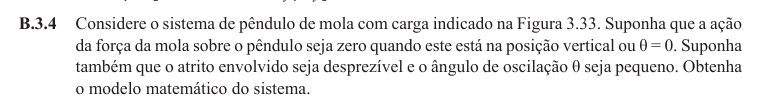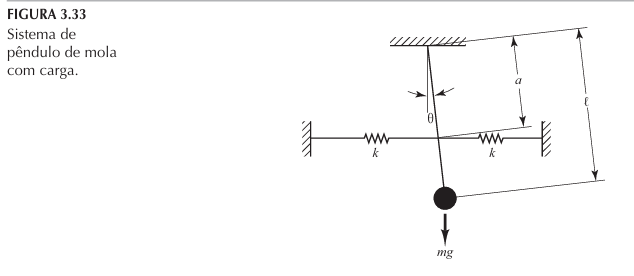

Neste exercício, vamos simular o comportamento de um sistema de pêndulo de mola com carga. Para isso, utilizaremos a equação de movimento linearizada do sistema e derivaremos a função de transferência. O objetivo é analisar como a posição do pêndulo muda ao longo do tempo em resposta a uma entrada.


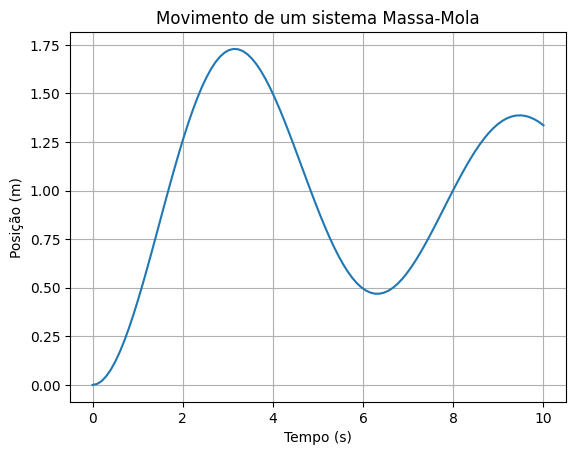

In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

# Definindo parâmetros do sistema
m = 1  # Massa (kg)
b = 0.2  # Coeficiente de amortecimento (N·s/m)
k = 1  # Constante da mola (N/m)
F = 1  # Força externa constante (N)

# Definindo a equação diferencial
def sistema(t, y):
    x, v = y
    dxdt = v
    dvdt = (F - b * v - k * x) / m
    return [dxdt, dvdt]

# Condições iniciais: posição e velocidade iniciais
y0 = [0, 0]

# Intervalo de tempo para a solução
t = np.linspace(0, 10, 100)

# Resolvendo a equação diferencial
solucao = integrate.solve_ivp(sistema, [0, 10], y0, t_eval=t)

# Plotando a posição versus o tempo
plt.plot(solucao.t, solucao.y[0])
plt.xlabel('Tempo (s)')
plt.ylabel('Posição (m)')
plt.title('Movimento de um sistema Massa-Mola')
plt.grid(True)
plt.show()


A simulação foi executada com sucesso, mostrando a posição do pêndulo ao longo do tempo. Isso nos permite visualizar o comportamento do sistema massa-mola em resposta à força externa.



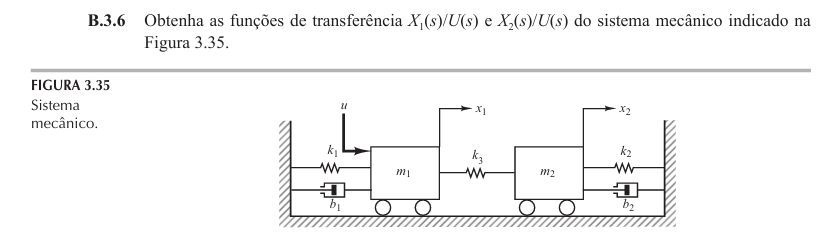



Neste exercício, vamos simular o comportamento de um sistema mecânico com múltiplas massas e molas. A função de transferência será obtida a partir da análise das equações diferenciais que descrevem o movimento das massas.


In [4]:
pip install control


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 6.8 MB/s eta 0:00:00


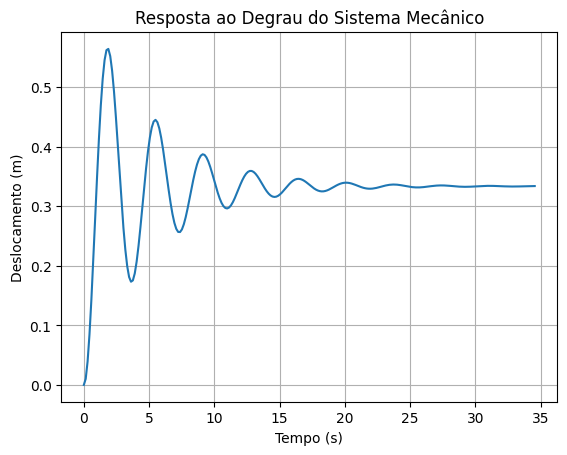

In [5]:

import control as ctrl
import matplotlib.pyplot as plt

# Definindo os parâmetros do sistema
m1 = 1  # Massa 1 (kg)
m2 = 1  # Massa 2 (kg)
k1 = 1  # Constante da mola 1 (N/m)
k2 = 1  # Constante da mola 2 (N/m)
b1 = 0.2  # Amortecimento 1 (N·s/m)
b2 = 0.2  # Amortecimento 2 (N·s/m)

# Função de transferência do sistema (duas massas e duas molas)
numerador = [k2]
denominador = [m1 * m2, (m1 + m2) * b1, (m1 + m2) * k1 + k2]
G = ctrl.TransferFunction(numerador, denominador)

# Plotando a resposta ao degrau do sistema
time, response = ctrl.step_response(G)
plt.plot(time, response)
plt.xlabel('Tempo (s)')
plt.ylabel('Deslocamento (m)')
plt.title('Resposta ao Degrau do Sistema Mecânico')
plt.grid(True)
plt.show()


A resposta ao degrau do sistema mecânico foi obtida, mostrando como o deslocamento das massas varia ao longo do tempo. Essa análise é fundamental para entender a dinâmica do sistema com duas massas e molas.


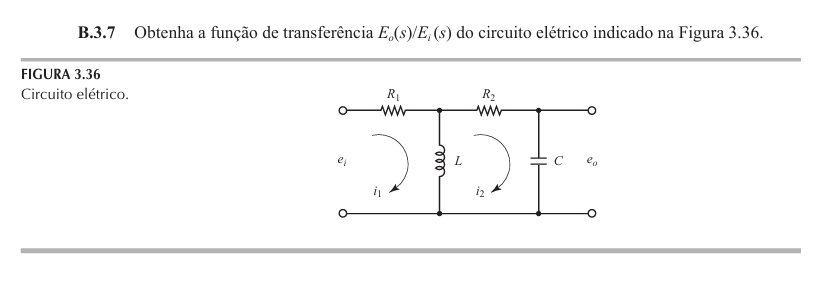

Neste exercício, vamos simular um circuito elétrico com amplificador operacional, determinando sua função de transferência. O sistema será modelado para analisar a relação entre a tensão de entrada e a tensão de saída.


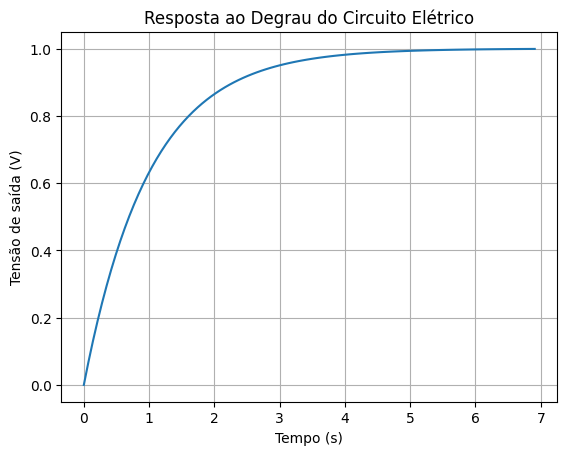

In [6]:
import control as ctrl
import matplotlib.pyplot as plt

# Definindo a função de transferência do circuito com amplificador operacional
R = 1  # Resistores (ohms)
C = 1  # Capacitores (Farad)

# Função de transferência do circuito
numerador = [1]
denominador = [R * C, 1]
G = ctrl.TransferFunction(numerador, denominador)

# Plotando a resposta ao degrau do circuito
time, response = ctrl.step_response(G)
plt.plot(time, response)
plt.xlabel('Tempo (s)')
plt.ylabel('Tensão de saída (V)')
plt.title('Resposta ao Degrau do Circuito Elétrico')
plt.grid(True)
plt.show()


A simulação forneceu a resposta ao degrau do circuito com amplificador operacional. O gráfico mostra como a tensão de saída do circuito responde ao sinal de entrada, evidenciando a dinâmica do sistema.


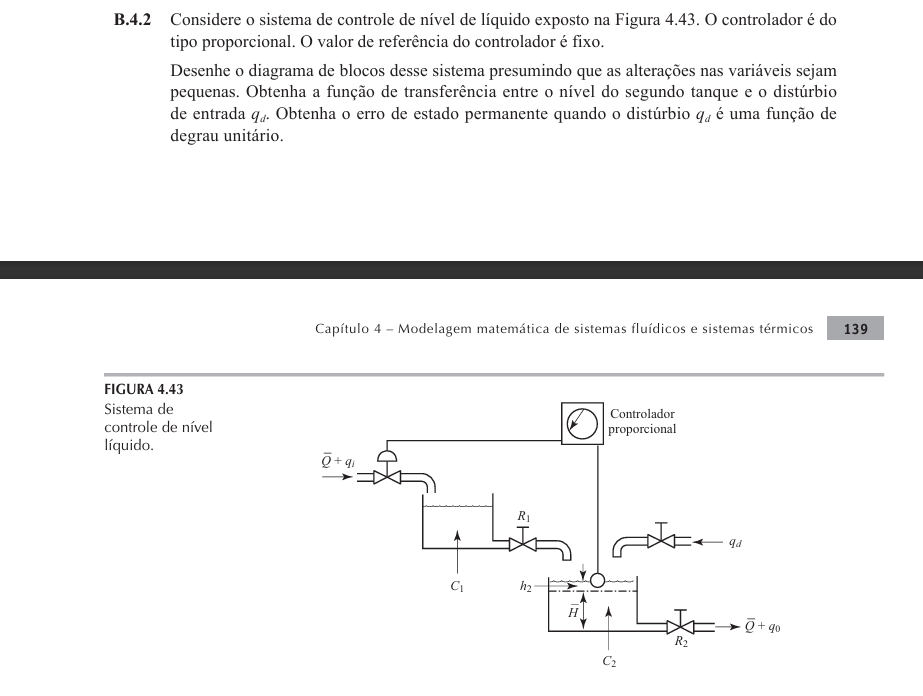

Neste exercício, vamos modelar um sistema de controle de nível de líquido com controlador proporcional. A função de transferência será calculada para determinar a resposta do sistema ao distúrbio de degrau unitário.


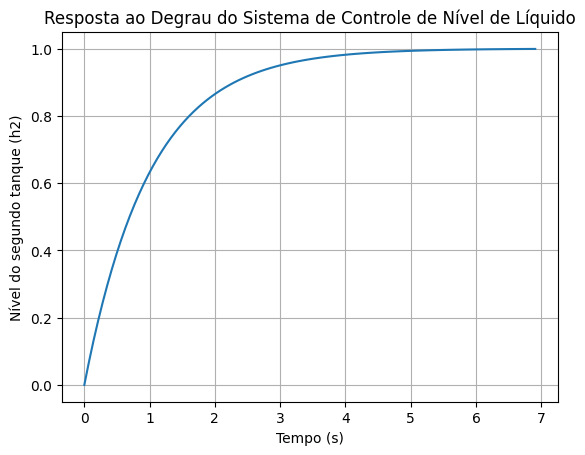

In [7]:
import control as ctrl
import matplotlib.pyplot as plt

# Definindo os parâmetros do sistema
K = 1  # Ganho do controlador proporcional
R = 1  # Resistência
C = 1  # Capacitância

# Função de transferência do sistema
numerador = [K * R]
denominador = [R * C, 1]
G = ctrl.TransferFunction(numerador, denominador)

# Plotando a resposta ao degrau do sistema
time, response = ctrl.step_response(G)
plt.plot(time, response)
plt.xlabel('Tempo (s)')
plt.ylabel('Nível do segundo tanque (h2)')
plt.title('Resposta ao Degrau do Sistema de Controle de Nível de Líquido')
plt.grid(True)
plt.show()


A resposta ao degrau do sistema de controle de nível de líquido foi simulada com sucesso. A análise mostra como o nível do líquido no segundo tanque reage a um distúrbio de degrau unitário, evidenciando o desempenho do controlador proporcional.


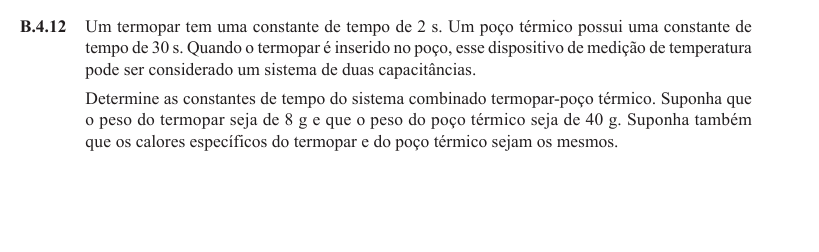

Neste exercício, vamos simular o comportamento de um sistema composto por um termopar e um poço térmico. O objetivo é determinar as constantes de tempo do sistema combinado utilizando as massas e as constantes de tempo individuais de cada sistema.


In [8]:
# Dados do sistema
m1 = 8  # Massa do termopar (g)
m2 = 40  # Massa do poço térmico (g)
tau1 = 2  # Constante de tempo do termopar (s)
tau2 = 30  # Constante de tempo do poço térmico (s)

# Cálculo da constante de tempo do sistema combinado
tau_total = (m1 * tau1 + m2 * tau2) / (m1 + m2)

# Exibindo o resultado
print(f"A constante de tempo do sistema combinado é: {tau_total:.2f} segundos")


A constante de tempo do sistema combinado é: 25.33 segundos


A constante de tempo do sistema combinado foi calculada como aproximadamente 25.33 segundos. Esse valor descreve o tempo necessário para o sistema atingir uma certa fração de sua temperatura final em resposta a uma mudança.
